## Pair Programming - Regresión lineal 9

### Regresión lineal Intro

---

In [3]:
# Tratamiento de datos
import pandas as pd
import numpy as np

# Gráficos
import matplotlib.pyplot as plt
import seaborn as sns

# Modelado y evaluación
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Crossvalidation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn import metrics

# Configuración warnings
import warnings
warnings.filterwarnings('ignore')

En el pair programming de hoy debéis usar el csv que guardastéis cuando hicistéis el pairprgramming de codificicación (este csv debería tener las variables estadandarizas).

El objetivo de este pairprogramming es que hagáis vuestro primer modelo de machine learning. Para eso recordad que:

- Deberéis separar la X y la y.
- Deberéis crear el train y el test.
- Ajustar vuestro modelo.

In [4]:
df = pd.read_csv('../archivos/metro_4.csv', index_col=0)
df.head()

,index,temp,rain_1h,snow_1h,clouds_all,weather_main,traffic_box,traffic_volume
0,0,0.738354,-0.13315,-0.032598,-0.753862,1,2101.064038,3539
1,1,0.619383,-0.13315,-0.032598,-1.241251,1,1681.830454,2784
2,2,0.561768,-0.13315,-0.032598,-1.241251,1,1443.409194,2361
3,3,-0.185732,-0.13315,-0.032598,-1.241251,1,1644.814972,2718
4,4,0.714410,-0.13315,-0.032598,-0.753862,1,2129.680912,3591


In [5]:
df.drop(['index', 'traffic_volume'], axis= 1, inplace=True)

In [6]:
df.head()

,temp,rain_1h,snow_1h,clouds_all,weather_main,traffic_box
0,0.738354,-0.13315,-0.032598,-0.753862,1,2101.064038
1,0.619383,-0.13315,-0.032598,-1.241251,1,1681.830454
2,0.561768,-0.13315,-0.032598,-1.241251,1,1443.409194
3,-0.185732,-0.13315,-0.032598,-1.241251,1,1644.814972
4,0.714410,-0.13315,-0.032598,-0.753862,1,2129.680912


### 1. Realizamos la regresión lineal.

In [7]:
X = df.drop('traffic_box', axis=1)
y = df['traffic_box']

In [8]:
X.head()

,temp,rain_1h,snow_1h,clouds_all,weather_main
0,0.738354,-0.13315,-0.032598,-0.753862,1
1,0.619383,-0.13315,-0.032598,-1.241251,1
2,0.561768,-0.13315,-0.032598,-1.241251,1
3,-0.185732,-0.13315,-0.032598,-1.241251,1
4,0.714410,-0.13315,-0.032598,-0.753862,1


In [9]:
y.head()

0    2101.064038
1    1681.830454
2    1443.409194
3    1644.814972
4    2129.680912
Name: traffic_box, dtype: float64

In [10]:
# Dividimos los datos en datos de entrenamiento y datos de testeo
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [11]:
# Iniciamos la regresión lineal
lr = LinearRegression(n_jobs=-1)

In [12]:
# Le pasamos los datos de entrenamiento
lr.fit(x_train, y_train)

LinearRegression(n_jobs=-1)

In [13]:
# Hacemos las predicciones, usando el método predict() de sklearn 
y_predict_train = lr.predict(x_train) 
y_predict_test = lr.predict(x_test) 

In [14]:
# Vemos los resultados
train_df = pd.DataFrame({'Real': y_train, 'Predicted': y_predict_train, 'Set': ['Train']*len(y_train)})
test_df  = pd.DataFrame({'Real': y_test,  'Predicted': y_predict_test,  'Set': ['Test']*len(y_test)})
resultados = pd.concat([train_df,test_df], axis = 0)
resultados.head()


,Real,Predicted,Set
480,1247.791770,1742.752956,Train
2995,1576.218141,1717.663973,Train
8483,1980.199934,1777.477622,Train
4665,1803.647225,1738.199500,Train
7139,1604.359455,1750.458995,Train


In [15]:
# Vemos los residuos
resultados['residuos'] = resultados['Real'] - resultados['Predicted']
resultados.head()

,Real,Predicted,Set,residuos
480,1247.791770,1742.752956,Train,-494.961186
2995,1576.218141,1717.663973,Train,-141.445832
8483,1980.199934,1777.477622,Train,202.722312
4665,1803.647225,1738.199500,Train,65.447725
7139,1604.359455,1750.458995,Train,-146.099540


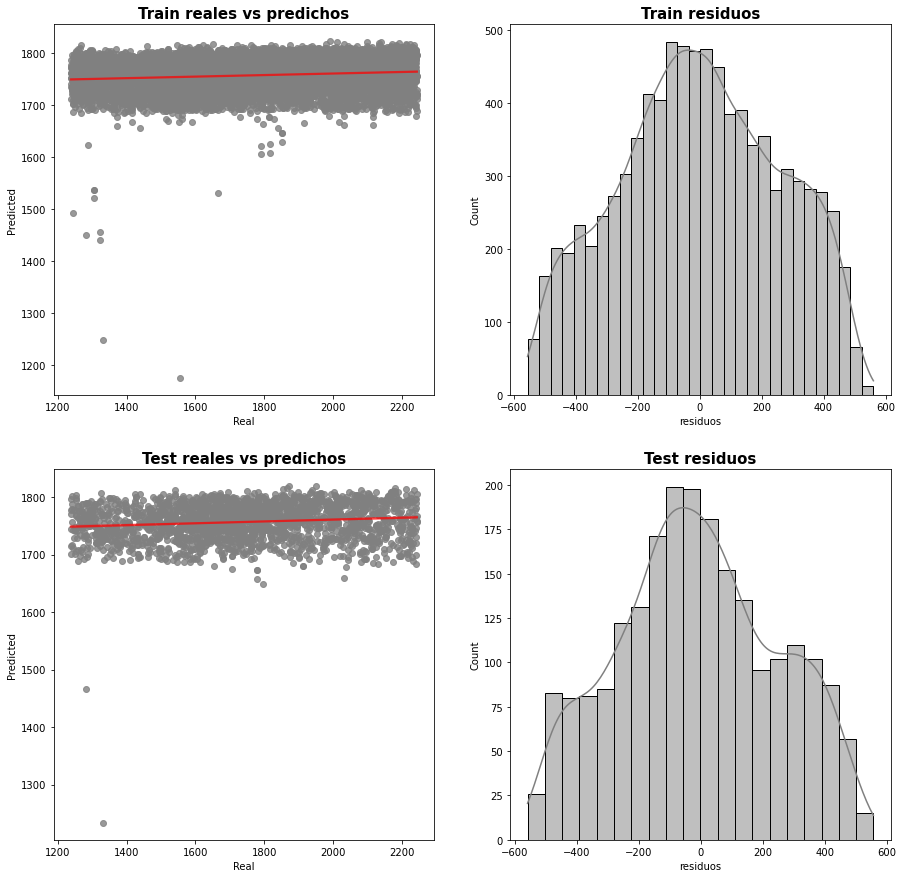

In [16]:
fig, ax = plt.subplots(2,2,figsize=(15,15))

# Vemos con gráficas los reales y los predichos
sns.regplot(data = resultados[resultados['Set'] == "Train"], 
            x = "Real", 
            y = "Predicted", 
            ax = ax[0,0], 
            color = "grey",
            line_kws = {"color": "red", "alpha": 0.7 })


sns.regplot(data = resultados[resultados['Set'] == "Test"], 
            x = "Real",
            y = "Predicted", 
            color = "gray",
            line_kws = {"color": "red", "alpha": 0.7 }, 
            ax = ax[1,0])


# Vemos con gráficas los residuos
sns.histplot(resultados[resultados['Set'] == "Train"],
             x="residuos",
             color ="grey",
             kde=True, 
             ax = ax[0,1])


sns.histplot(resultados[resultados['Set'] == "Test"],
             x="residuos",
             color = "grey",
             kde=True, 
             ax = ax[1,1])

ax[0,0].set_title("Train reales vs predichos", fontsize = 15, fontweight = "bold")
ax[0,1].set_title("Train residuos", fontsize = 15, fontweight = "bold")
ax[1,0].set_title("Test reales vs predichos", fontsize = 15, fontweight = "bold")
ax[1,1].set_title("Test residuos", fontsize = 15, fontweight = "bold");

### 2. Realizamos la regresión lineal con el método Cross-Validation

In [17]:
# Validación cruzada repetida con una única métrica
cv_scores = cross_val_score(
                estimator = LinearRegression(), #algoritmo
                X         = X, 
                y         = y, 
                scoring   = 'neg_root_mean_squared_error',  #métrica
                cv        = 10 # nº iteraciones
             )

print(f"Métricas validación cruzada: {cv_scores}") # las métricas para cada una de las iteraciones
print(f"Média métricas de validación cruzada: {cv_scores.mean()}") # la media de todas las iteraciones.

Métricas validación cruzada: [-270.78639876 -253.81330662 -265.11757054 -250.98247046 -258.1480852
 -255.80817683 -267.32353159 -248.08650837 -270.8500602  -250.87253076]
Média métricas de validación cruzada: -259.1788639327384


In [18]:
# Validación cruzada repetida con múltiples métricas
cv_scores = cross_validate(
                estimator = LinearRegression(),
                X         = X,
                y         = y,
                scoring   = ('r2', 'neg_root_mean_squared_error'),
                cv        = 10)

cv_scores = pd.DataFrame(cv_scores)
cv_scores

,fit_time,score_time,test_r2,test_neg_root_mean_squared_error
0,0.008883,0.004340,-0.008688,-270.786399
1,0.004484,0.002830,0.005385,-253.813307
2,0.010888,0.006951,-0.008539,-265.117571
3,0.003718,0.002468,0.031928,-250.982470
4,0.007710,0.001941,0.008383,-258.148085
5,0.002554,0.001431,-0.025007,-255.808177
6,0.002312,0.006676,0.009410,-267.323532
7,0.009343,0.015582,0.007660,-248.086508
8,0.008955,0.002415,-0.057284,-270.850060
9,0.003626,0.003051,0.028771,-250.872531


In [19]:
# calculamos la media para cada una de las métricas

print(f'la media para el r2 es {cv_scores["test_r2"].mean().round(2)}')
print(f'la media para el RMSE es {abs(cv_scores["test_neg_root_mean_squared_error"].mean()).round(2)}')

la media para el r2 es -0.0
la media para el RMSE es 259.18


### 3. Cálculo de métricas. 
### Pair programming 10 - Regresión lineal métricas

En el pair programming anterior creastéis vuestro primer modelo de machine learning usando la regresion Lineal. Es el momento, que con vuestros datos evaluéis si es bueno haciendo predicciones. Los objetivo de este pairprogramming son:

- Calculéis las métricas para vuestro modelo
- Discutid los resultados de las métricas y extraed conclusiones
- Guardad los resultados de las métricas en un csv para usarlo más adelante.

In [20]:
resultados_metricas = {'MAE': [mean_absolute_error(y_test, y_predict_test), mean_absolute_error(y_train, y_predict_train)],
                'MSE': [mean_squared_error(y_test, y_predict_test), mean_squared_error(y_train, y_predict_train)],
                'RMSE': [np.sqrt(mean_squared_error(y_test, y_predict_test)), np.sqrt(mean_squared_error(y_train, y_predict_train))],
                'R2':  [r2_score(y_test, y_predict_test), r2_score(y_train, y_predict_train)],
                 "set": ["test", "train"], 
                 "modelo": ["Linear Regresion", "Linear Regression"]}

df_resultados = pd.DataFrame(resultados_metricas)

df_resultados

,MAE,MSE,RMSE,R2,set,modelo
0,210.518843,65706.105082,256.332021,0.015172,test,Linear Regresion
1,214.320206,66978.132259,258.801337,0.014838,train,Linear Regression


In [21]:

df_resultados.to_csv("../archivos/resultados_metro_LR.csv")

In [22]:
resultados

,Real,Predicted,Set,residuos
480,1247.791770,1742.752956,Train,-494.961186
2995,1576.218141,1717.663973,Train,-141.445832
8483,1980.199934,1777.477622,Train,202.722312
4665,1803.647225,1738.199500,Train,65.447725
7139,1604.359455,1750.458995,Train,-146.099540
...,...,...,...,...
474,1343.884447,1742.857884,Test,-398.973436
4863,1436.602301,1696.131888,Test,-259.529587
6681,2102.165252,1727.019378,Test,375.145873
10216,1822.586774,1792.969556,Test,29.617219


**Conclusiones**

Viendo los resultados:
- El R2 es muy bajo, por tanto nuestras variables predictoras no dan los suficientes datos como para hacer una predicción de la variable respuesta correcta o dentro de unos márgenes aceptables.
- El RMSE es muy alto y llegamos a la conclusión de que con los datos que tenemos el tiempo influya en la volumen del tráfico en el metro.

Probaremos a realizar otro modelo que incluya otras variables y de probar a no normalizar la variable respuesta.
